In [1]:
import pandas as pd

In [2]:
bitcoin = pd.read_csv('BTC_USD.csv')
print(bitcoin)

     Currency        Date  Closing Price          Open          High  \
0         BTC  2013-10-01     123.654990    124.304660    124.751660   
1         BTC  2013-10-02     125.455000    123.654990    125.758500   
2         BTC  2013-10-03     108.584830    125.455000    125.665660   
3         BTC  2013-10-04     118.674660    108.584830    118.675000   
4         BTC  2013-10-05     121.338660    118.674660    121.936330   
...       ...         ...            ...           ...           ...   
2605      BTC  2020-11-28   17023.961400  17180.718730  17482.200105   
2606      BTC  2020-11-29   17814.780278  17159.109497  17901.382623   
2607      BTC  2020-11-30   18114.414349  17742.823039  18356.313227   
2608      BTC  2020-12-01   19382.360586  18201.277248  19850.114487   
2609      BTC  2020-12-02   18980.977450  19677.989844  19920.534263   

               Low  
0       122.563490  
1       123.633830  
2        83.328330  
3       107.058160  
4       118.005660  
...      

In [3]:
data = pd.DataFrame(bitcoin, columns = ['Closing Price','Open','High','Low'])
x = data.iloc[:,1:4].values #atribut
y = data.iloc[:,0].values #target
size = int(len(x) * 0.90)
x_train, x_test = x[0:size], x[size:len(x)]
y_train, y_test = y[0:size], y[size:len(x)]
print ('x_test',x_test.shape, x_test[:5])
print ('y test', y_test[:5])

x_test (261, 3) [[5359.58199532 5439.46670295 4452.26054523]
 [4944.69250872 5558.1292949  4921.20314466]
 [5465.55526098 5466.94233541 5043.07509171]
 [5363.81623026 6428.78044323 5274.92711177]
 [6301.1202913  6942.93526784 5680.10328163]]
y test [4944.70233598 5465.58259412 5363.82285325 6301.06340407 6185.27983852]


In [4]:
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

In [5]:
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=3, activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='relu'))
model.add(tf.keras.layers.Dense(units=1))
model.compile(loss='mean_absolute_error', optimizer= tf.keras.optimizers.Adam(0.001))

model.fit(x_train, y_train, epochs =100, batch_size = 30)
accuracy = model.evaluate(x_test, y_test)

Epoch 1/100
79/79 [==============================] - 3s 2ms/step - loss: 3319.6162
Epoch 2/100
79/79 [==============================] - 0s 828us/step - loss: 1528.6264
Epoch 3/100
79/79 [==============================] - 0s 1ms/step - loss: 49.8858
Epoch 4/100
79/79 [==============================] - 0s 892us/step - loss: 45.0814
Epoch 5/100
79/79 [==============================] - 0s 940us/step - loss: 41.6621
Epoch 6/100
79/79 [==============================] - 0s 1ms/step - loss: 48.6981
Epoch 7/100
79/79 [==============================] - 0s 1ms/step - loss: 44.8037
Epoch 8/100
79/79 [==============================] - 0s 857us/step - loss: 44.9078
Epoch 9/100
79/79 [==============================] - 0s 754us/step - loss: 43.9732
Epoch 10/100
79/79 [==============================] - 0s 665us/step - loss: 44.4304
Epoch 11/100
79/79 [==============================] - 0s 744us/step - loss: 39.5148
Epoch 12/100
79/79 [==============================] - 0s 627us/step - loss: 40.4473
Epoch

In [6]:
predict = model.predict(x_test) 
print(predict)

[[ 4711.7085]
 [ 5437.8765]
 [ 5132.515 ]
 [ 6183.736 ]
 [ 6348.357 ]
 [ 6190.193 ]
 [ 6087.4507]
 [ 6383.65  ]
 [ 6755.6255]
 [ 6714.0303]
 [ 6651.3794]
 [ 6743.7163]
 [ 6182.999 ]
 [ 5997.966 ]
 [ 6477.2197]
 [ 6412.9526]
 [ 6351.478 ]
 [ 7086.267 ]
 [ 6860.928 ]
 [ 6878.2075]
 [ 6751.619 ]
 [ 7207.344 ]
 [ 7277.1284]
 [ 7364.985 ]
 [ 7201.5093]
 [ 6874.514 ]
 [ 6860.0483]
 [ 7085.8794]
 [ 6698.822 ]
 [ 6879.4272]
 [ 6784.3286]
 [ 6974.693 ]
 [ 7060.284 ]
 [ 7231.8647]
 [ 7121.96  ]
 [ 6881.91  ]
 [ 6876.9624]
 [ 7063.062 ]
 [ 7560.4204]
 [ 7479.5864]
 [ 7624.5034]
 [ 7647.0737]
 [ 7764.0083]
 [ 7701.7993]
 [ 8744.563 ]
 [ 9074.536 ]
 [ 8883.311 ]
 [ 8947.49  ]
 [ 8983.256 ]
 [ 8667.494 ]
 [ 8991.0625]
 [ 9248.066 ]
 [ 9619.166 ]
 [ 9898.156 ]
 [ 9654.691 ]
 [ 8501.889 ]
 [ 8686.415 ]
 [ 8838.883 ]
 [ 9300.002 ]
 [ 9792.54  ]
 [ 9332.867 ]
 [ 9430.547 ]
 [ 9729.093 ]
 [ 9769.607 ]
 [ 9670.777 ]
 [ 9508.109 ]
 [ 8985.89  ]
 [ 9079.401 ]
 [ 9210.616 ]
 [ 8998.56  ]
 [ 8730.312 ]
 [ 883

Matplotlib is building the font cache; this may take a moment.


72.40868377685547


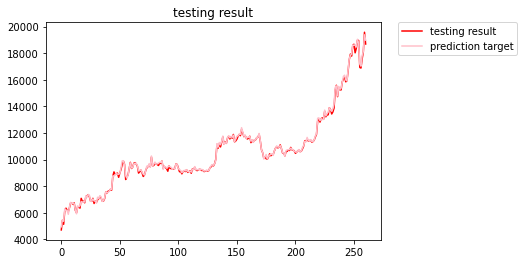

In [7]:
import matplotlib as mlp
import matplotlib.pyplot as plt

print(accuracy)

plt.plot(predict,color='red',label='testing result')
plt.plot(y_test,color='pink',label='prediction target')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('testing result')
plt.show()
